In [2]:
import ROOT

Welcome to JupyROOT 6.28/04


In [3]:
def getTREES(file):
    key_list = file.GetListOfKeys()
    trees = []
    for key in key_list:
        # Get the object associated with the key
        obj = key.ReadObj()
        # Check if the object is a TTree
        if isinstance(obj, ROOT.TTree):
            # Append the name of the tree to the array
            trees.append(obj.GetName())
    
    trees.insert(0, 'Select Tree')
    drop_down_trees = widgets.Dropdown(options=trees,
                                    description='🌴 Tree:',
                                    disabled=False,
                                    layout={'width': 'max-content'})
    return drop_down_trees

In [16]:
from ipywidgets import interact, widgets

chain = ROOT.TChain("nt", "nt")
file = ROOT.TFile.Open('final_np_15yr.root')

drop_down_trees = getTREES(file)
display(drop_down_trees)

Dropdown(description='🌴 Tree:', layout=Layout(width='max-content'), options=('Select Tree', 'global_fit_info',…

ReadStreamerInfo, class:string, illegal uid=-2


In [17]:
root_file = ROOT.TFile('final_np_15yr.root')
keys = root_file.GetListOfKeys()
for key in keys:
    obj = key.ReadObj()
    obj.Print()

******************************************************************************
*Tree    :global_fit_info: Fit information                                        *
*Entries :   339691 : Total =      2704966534 bytes  File  Size = 1701200470 *
*        :          : Tree compression factor =   1.54                       *
******************************************************************************
*Br    0 :chisq     : chisq/D                                                *
*Entries :   339691 : Total  Size=   37706014 bytes  File Size  =   30911881 *
*Baskets :   339691 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :NSeconds  : NSeconds/i                                             *
*Entries :   339691 : Total  Size=   37366327 bytes  File Size  =   30572190 *
*Baskets :   339691 : Basket Size=      32000 bytes  Compression=   1.00     *
*..............................................

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


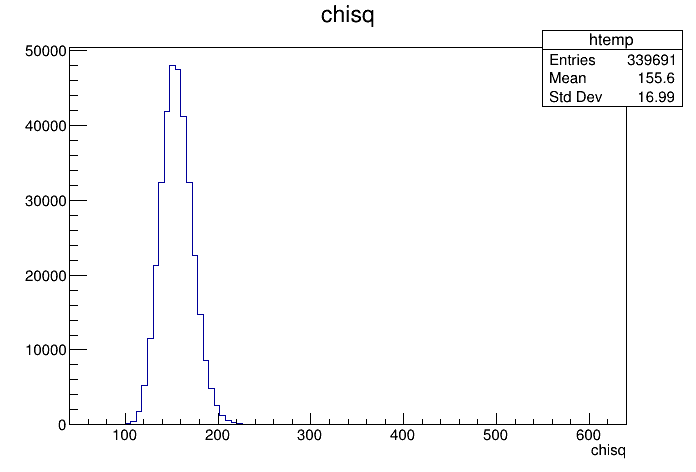

In [18]:
tree = root_file.Get(drop_down_trees.value)
canvas = ROOT.TCanvas("canvas", "Plot")
tree.Draw("chisq")
canvas.Draw()